In [1]:
import numpy as np
from scipy.special import softmax, log_softmax
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import pandas as pd

In [8]:
def generate_agent_data(alpha, beta, rew_prob, n_trials=100):

    n_arms = len(rew_prob)
    actions = np.zeros(shape=(n_trials,), dtype=np.int32)
    reward = np.zeros(shape=(n_trials,), dtype=np.int32)

    Qs = np.zeros(shape=(n_trials, n_arms))
    Qs[0] = np.ones(shape=(n_arms,)) / n_arms

    for i in range(n_trials):

        # choose the action based of softmax function
        prob_a = softmax(beta*Qs[i])
        a = np.random.choice(a=range(n_arms), p=prob_a) # select the action
        # list of actions that were not selected
        a_left = list(range(n_arms))
        a_left.remove(a)

        # reward
        if np.random.rand() < rew_prob[a]: # if arm brings reward
            r = 1
        else:
            r = 0

        reward[i] = r
        actions[i] = a

        if i < n_trials-1:
            # value function update for a chosen arm
            Qs[i+1, a] = Qs[i, a] + alpha * (r - Qs[i, a])
            # value function update for non-chosen arms
            for a_l in a_left:
                Qs[i+1, a_l] = Qs[i, a_l]

    return actions, reward, Qs

In [27]:
np.random.seed(2)
agent_data = pd.DataFrame()
true_params = {}

for subj in range(1, 11):

    true_params[subj] = {}

    alpha = np.random.randint(low=20, high=60) / 100 # RV in [0.3, 0.5]
    beta = np.random.randint(low=1, high=60) / 10 # RV in [0.1, 8]
    n_trials = np.random.randint(low=200, high=250)

    actions, reward, Qs = generate_agent_data(
        alpha=alpha,
        beta=beta,
        rew_prob=[0.2, 0.8],
        n_trials=n_trials)

    # add generated data to temporary data frame
    temp_df = pd.DataFrame({
        'subjID': subj, 'trial': range(1, n_trials+1),
        'choice': actions, 'reward': reward})

    agent_data = agent_data.append(temp_df)

    # update dictionary with true parameter values
    true_params[subj]['alpha'] = alpha
    true_params[subj]['beta'] = beta

In [28]:
true_params_df = pd.DataFrame(true_params).T.reset_index(drop=False)
true_params_df.rename(columns={'index': 'subjID'}, inplace=True)
true_params_df.head()

,subjID,alpha,beta
0,1,0.35,4.6
1,2,0.22,3.3
2,3,0.29,2.4
3,4,0.55,5.9
4,5,0.30,4.3


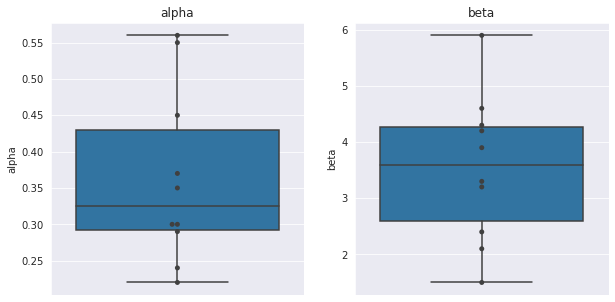

In [29]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.boxplot(y="alpha", data=true_params_df)
sns.swarmplot(y="alpha", data=true_params_df, color=".25")
plt.title('alpha')

plt.subplot(122)
sns.boxplot(y="beta", data=true_params_df)
sns.swarmplot(y="beta", data=true_params_df, color=".25")
plt.title('beta')

plt.show()

In [30]:
agent_data.to_csv("sample_data/agent_data.csv", index=False)
true_params_df.to_csv("sample_data/true_params.csv", index=False)